# Principal Component Analysis (PCA)

En esta libreta veremos una técnica que está a medio camino entre la etapa de transformación y y la minería de datos. En algunas ocasiones, el PCA se puede usar para transformar los datos (para crear una variable sintética) o para extraer información de los datos preparados (para identificar la contribución de distintas variables). En esta libreta, la veremos en su rol como algoritmo de transformación de datos. En esta libreta también veremos por primera vez la librería <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>, que contiene algoritmos de aprendizaje automático. PCA se puede considerar un algoritmo de aprendizaje automático, dado que toma unos datos y extrae de ellos una información concreta. En otras palabras, no es un algoritmo propio de ningún campo concreto (como la gestión de un parking o el seguimiento de un grupo de alumnos), sino que es agnóstico al tipo de dato. En su lugar, sí suele tener unas necesidades específicas en cuanto al formato de los datos, con lo que, en caso de estar en la etapa de transformación, suele ir precedido de otras tareas de transformación. Además, veremos también nuevos tipos de visualización de datos, con la librería <a href="https://seaborn.pydata.org/">Seaborn</a>, que nos ayudará a visualizar datos de altas dimensionalidades.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA     # Nuevo: clase con las funcionalidades PCA
from sklearn.datasets import load_iris    # Nuevo: función que devuelve un conjunto de datos
import seaborn as sns                     # Nuevo: librería Seaborn
import matplotlib.pyplot as plt

Supongamos un conjunto de datos con $N$ dimensiones, o, en otras palabras, un grupo de vectores (filas) con $N$ componentes (columnas). Podremos representar cada fila como un punto $N$ dimensional, donde cada componente indica una coordenada sobre uno de $N$ ejes. Para $N=2$, podríamos representar los datos en forma de una nube de puntos:

<img src="imagenes/cloud1.png" style="width:20em; margin: 0 auto;"/>
<br/>

Cada punto está representado por una coordenada $X$ y una $Y$. Si observamos bien esta gráfica, veremos que la nube de puntos representada tiene una forma alargada. Podríamos definir un nuevo sistema de coordenadas $UV$ adaptado a la forma de la nube:

<img src="imagenes/cloud2.png" style="width:20em; margin: 0 auto;"/>
<br/>

En este caso, los puntos, que tendrían las mismas posiciones relativas, pasarían a tener una coordenada $U$ que representaría su posición en el eje que podemos llamar "longitudinal" de la nube, y una coordenada $V$ que podemos llamar "transversal". Además, la coordenada $V$ tiende a tener valores pequeños, ya que la nube se concentra alrededor del eje $U$. En otras palabras, la coordenada $U$ tiene más información que la $V$, ya que nos da, ella sóla, una posición suficientemente exacta del punto en la nube (al menos para algunas aplicaciones). Este concepto de reducir de 2 dimensiones a 1 no nos es ajeno en nuestra vida diaria. Podemos pensar en cómo un mapa de una línea de tren o autobús reduce un grupo de puntos bidimensionales (las paradas) en una única dimensión:

<img src="https://www.redtransporte.com/img/transporte/malaga/metro-malaga/plano-metro-malaga.jpg" style="width:30em; margin: 0 auto;"/>

<img src="https://metromalaga.es/wp-content/uploads/2019/02/mm_esquemalineas.jpg" style="width:30em; margin: 0 auto;"/>

Si bien este ejemplo no es exactamente lo mismo que encontrar un nuevo eje de coordenadas (dado que hablamos de una transformación no lineal), sí que ayuda a visualizar de forma intuitiva el efecto de reducción de dimensionalidad de 2 a 1 dimensiones.

PCA es una técnica que, dado una serie de puntos $N$ dimensionales, permite encontrar un nuevo sistema de coordenadas de $N$ dimensiones de las que algunas pueden ser descartadas, quedando un sistema de $M$ dimensiones, donde $M<N$. PCA devuelve los vectores en función de este nuevo sistema de coordenadas, y las componentes se ordenan de mayor a menor importancia.

En este apartado usaremos un conjunto de datos de mayor dimensionalidad que los vistos hasta ahora. Scikit-learn proporciona dichos datos para hacer pruebas. Podemos encontrar la información de los conjuntos de datos que ofrece en <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html">la documentación</a>. Concretamente, tomaremos un conjunto de datos que se suele usar de ejemplo y para validación de técnicas a menudo, el conjunto de datos <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset">Iris</a>, del artículo <a href="https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x">The use of multiple measurements in taxonomic problems</a> de R.A. Fisher. Este conjunto de datos contiene información acerca de algunos parámetros medidos sobre un conjunto de flores (ej. longitud de los sépalos y pétalos) distribuidas en tres clases. Se suele utilizar para evaluar la precisión de clasificadores. La función <code>load_iris()</code> que hemos importado al principio, nos devolverá un diccionario con el <code>DataFrame</code> (para lo cual tenemos que pasarle el parámetro opcional <code>as_frame = True</code>) con los datos de las flores, un <code>Series</code> indicando su clase e información adicional. Veamos, elemento a elemento, lo que contiene dicho diccionario:

In [2]:
datos_iris = load_iris(as_frame=True)

En <code>datos_iris["frame"]</code> tendremos los datos de las flores y su clasificación:

In [3]:
datos_iris["frame"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


En esta tabla de datos, podemos observar que hay un total de 5 columnas. Las primeras 4 contienen los datos de las flores, y la última, su clase. Esta última columna recibe el nombre de <code>target</code> (objetivo), porque suele ser la columna que tienen que acertar los clasificadores observando las primeras 4. Veremos esto con más detalle cuando veamos los clasificadores. De momento, querremos visualizar estos datos para poder tener una idea de qué representan, y sobre todo qué patrones podemos observar a simple vista. Con esta información, podremos elegir mejor el tipo de procesado que hace falta siempre. En este caso, no tenemos series temporales, sino que cada fila representa un punto de medida independiente. No tiene mucho sentido representar los datos como series. Además, tenemos cuatro variables, las cuales no sabemos muy bien cómo se representan. Seaborn es una librería de representación gráfica que, además de permitirnos unas representaciones muy complejas, nos provee de una funcionalidad de representación resumida de un conjunto de datos clasificados muy útil. Se trata de la función <code>pairplot()</code>, a la que pasamos un <code>DataFrame</code> e identificamos la columna que dice la class:

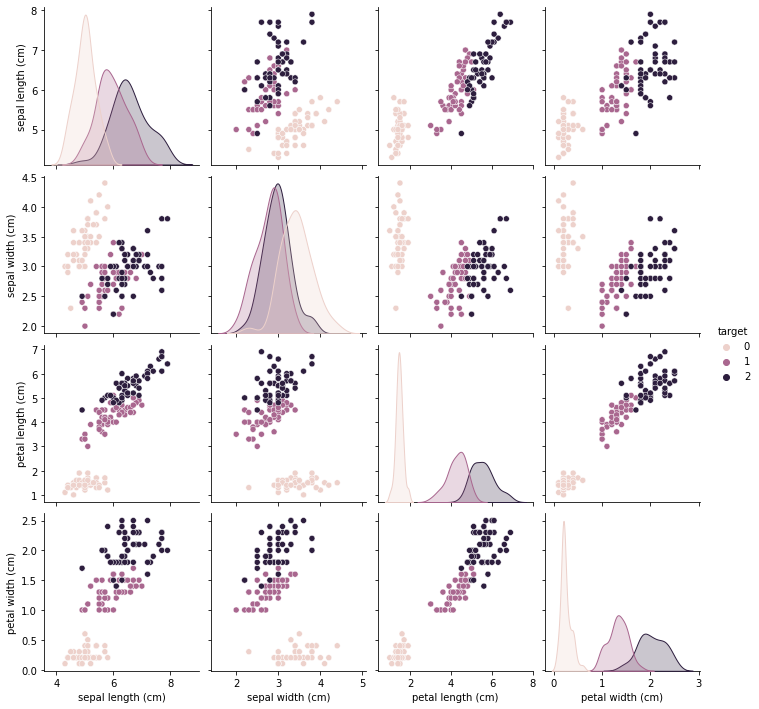

In [4]:
sns.pairplot(datos_iris["frame"], hue="target")
plt.show()

Esta representación tiene mucha información. Concretamente, podemos observar una matriz de 4x4 gráficas. La diagonal muestra la distribución de valores de cada clase para la variable indicada por la fila/columna. El resto de casillas, dibujan la nube de puntos definida por la variable de la columna (en el eje X) y la variable de la fila (en el eje Y). Cada punto está coloreado según la clase que le corresponde. Esto nos dice bastante, por ejemplo, podemos ver que sólo con el ancho del pétalo, podríamos distinguir bien entre la clase 0 y el resto. Las clases 1 y 2 son muy parecidas en muchas características, pero hay algunas combinaciones de variables que nos podrían ayudar a distinguirlas, por ejemplo, tomando el ancho y el largo del pétalo. Tendríamos más información si pudiésemos representar las variables de 3 en 3, pero eso complicaría mucho la visualización.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 1</b><br/>
    <p>Scikit-learn proporciona varios datasets de ejemplo más. Uno de ellos, similar al de las flores, es el del reconocimiento y clasificación de vinos. Puede encontrar los detalles <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset">aquí</a>. Dicho dataset se carga con la función <code>load_wine()</code>. Importe la función y guarde los datos en un <code>DataFrame</code> denominado <code>vinos</code>. Recuerde que la función <code>load_wine()</code> devuelve un diccionario, dentro del cual tendrá acceso al <code>DataFrame</code> usando el índice <code>frame</code>. A continuación, realice la exploración de las variables con <code>pairplot</code>. NOTA: este comando puede tardar en ejecutarse incluso en ordenadores relativamente nuevos.</p>
</div>

En resumen, podemos concluir que, en el caso del dataset de las flores, con dos variables: el ancho y la longitud de petalo, podemos obtener la clase con cierta precisión. En el mundo real, no se haría esta simplificación, porque como se puede observar, otras variables y sus combinaciones también nos pueden ayudar a realizar la clasificación. No obstante, para explicar mejor el concepto de PCA, vamos a quedarnos sólo con estas dos variables:

In [5]:
df_iris = datos_iris["frame"].loc[:,["petal length (cm)","petal width (cm)","target"]]
df_iris

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


La representación con <code>pairplot</code> será ahora mucho más reducida:

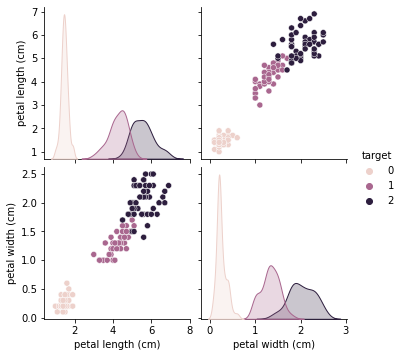

In [6]:
sns.pairplot(df_iris, hue="target")
plt.show()

Podemos observar que podríamos realizar la clasificación con estas dos variables estableciendo unas fronteras en el espacio bidimensional:

<img src="imagenes/lonwid.png" style="width:30em; margin: 0 auto;"/>
<br />

Esto implicaría programar una función que defina dichas regiones y actúe en consecuencia. Se puede hacer, pero no es tan simple como hacer una comparación con un umbral. Sin embargo, la nube de puntos tiene, claramente, un eje a lo largo del cual se concentran las muestras, y, sobre dicho eje, hay dos puntos que pueden separar igual de bien las muestras según su clase:

<img src="imagenes/lonwid2.png" style="width:30em; margin: 0 auto;"/>
<br />

Si los valores vinieran dados en función de ese eje, la clasificación sería tan simple como una comparación con dos umbrales. Como vimos antes, PCA hace justamente esto. En primer lugar, generamos el objeto que realizará la función PCA:

In [7]:
pca = PCA()

A continuación, lo ajustamos a los datos:

In [8]:
pca.fit( df_iris.drop("target", axis=1) )

PCA()

Le hemos pasado todos los datos excepto la columna <code>target</code> que, recordemos, no es parte de los datos en sí, sino nuestro objetivo. El método <code>fit()</code> modifica el objeto <code>pca</code>, que ahora contiene información acerca de las variables. Concretamente, ha creado dos variables nuevas, que son combinación lineal de las primeras; o, en otras palabras, ha creado un nuevo sistema de coordenadas $UV$ en el espacio bidimensional. Podemos ver las componentes de dicho sistema en términos del espacio $XY$ (siendo $X$ la longitud del pétalo e $Y$ su anchura):

In [9]:
pca.components_

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

Además, podemos ver cuánta información contiene cada una de las nuevas dimensiones $UV$:

In [10]:
pca.explained_variance_ratio_

array([0.99025066, 0.00974934])

Esto nos dice que la primera componente tiene algo más del 99% de la información. Con esto, podemos quedarnos sólo con una dimensión. Hasta este punto, lo único que hemos hecho ha sido crear un nuevo sistema de coordenadas, pero aún no hemos transformado los datos originales. Para esto, usaremos el método <code>transform()</code>, que devuelve un <code>array</code> de Numpy. Para obtener un <code>DataFrame</code> tendremos que crear uno nuevo con esos datos:

In [11]:
transformado_array = pca.transform( df_iris.drop("target", axis=1) )
df_iris_transformado = pd.DataFrame(transformado_array)
df_iris_transformado

,0,1
0,-2.561012,-0.006922
1,-2.561012,-0.006922
2,-2.653190,0.031850
3,-2.468834,-0.045694
4,-2.561012,-0.006922
...,...,...
145,1.755953,0.455479
146,1.416510,0.164312
147,1.639637,0.178946
148,1.940308,0.377936


Estas nuevas variables, la variable <code>0</code> y la variable <code>1</code> son sintéticas, por lo que no tienen un significado físico directo. Son combinaciones lineales de otras variables que sí tienen significado físico. Podemos reconstruir el <code>DataFrame</code> con las clases con una simple transformación que ya conocemos bien:

In [12]:
df_iris_transformado = pd.concat([df_iris_transformado, df_iris.loc[:,"target"]], axis=1)

In [13]:
df_iris_transformado

,0,1,target
0,-2.561012,-0.006922,0
1,-2.561012,-0.006922,0
2,-2.653190,0.031850,0
3,-2.468834,-0.045694,0
4,-2.561012,-0.006922,0
...,...,...,...
145,1.755953,0.455479,2
146,1.416510,0.164312,2
147,1.639637,0.178946,2
148,1.940308,0.377936,2


<div style="background-color:lightpink; padding:1em"><b>Ejercicio 2</b><br/>
    <p>Realice la transformación de las variables con PCA sobre el conjunto de datos <code>vinos</code>. Recuerde que tiene que usar un nombre distinto para el nuevo objeto PCA (por ejemplo, <code>pca2</code>. Observe la información que lleva cada componente y calcule cuántas variables hace falta para que se mantenga el 80% de la información</p>
</div>

Veamos cómo se comporta ahora el nuevo conjunto de datos obtenido del PCA de la tabla de las flores:

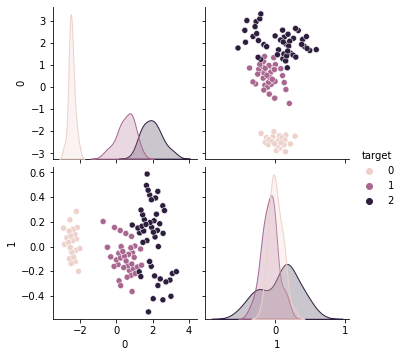

In [14]:
sns.pairplot(df_iris_transformado, hue="target")
plt.show()

Podemos ver que tan sólo con la variable <code>0</code> podríamos hacer una clasificación. Basta identificar los umbrales apropiados. Para ello existen técnicas muy avanzadas, pero de momento, utilizaremos unos umbrales ajustados manualmente de forma iterativa. Podemos decir que las muestras con el parámetro <code>0</code> que tienen un valor menor que -1 son todos de la clase 0, y aquellos que tienen un valor mayor que 1.17, son de la clase 2:

In [15]:
def clasificador(fila):
    valor = fila[0]
    if valor < -1:
        return 0
    if valor > 1.17:
        return 2
    else:
        return 1

Aplicamos ahora esta función al <code>DataFrame</code>:

In [16]:
df_iris_transformado.loc[:,"target_estimado"] = df_iris_transformado.apply(clasificador, axis=1)
df_iris_transformado

,0,1,target,target_estimado
0,-2.561012,-0.006922,0,0
1,-2.561012,-0.006922,0,0
2,-2.653190,0.031850,0,0
3,-2.468834,-0.045694,0,0
4,-2.561012,-0.006922,0,0
...,...,...,...,...
145,1.755953,0.455479,2,2
146,1.416510,0.164312,2,2
147,1.639637,0.178946,2,2
148,1.940308,0.377936,2,2


Podemos ver los aciertos y los fallos con un par de líneas de código. Primero creamos un <code>Series</code> con booleanos que dicen si la columna <code>target_estimado</code> y <code>target</code> son iguales:

In [17]:
aciertos = (df_iris_transformado.loc[:,"target_estimado"] == df_iris_transformado.loc[:,"target"])

Y a continuación, hacemos un conteo de valores distintos en el <code>Series</code>:

In [18]:
aciertos.value_counts()

True     146
False      4
dtype: int64

Esto significa que nuestro estimador, con una sóla variable, tiene 146 aciertos y 4 fallos. 

Normalmente, usaremos PCA para transformar unos datos, y a continuación procesarlos (como acabamos de hacer con el clasificador). Ocasionalmente, querremos hacer la transformación inversa; es decir, dados un punto en el espacio de salida del PCA, obtener el punto en el espacio original. Esto lo podremos hacer con:

In [19]:
datos_originales = pca.inverse_transform( df_iris_transformado.drop( ["target", "target_estimado"], axis=1))
datos_originales = pd.DataFrame(datos_originales)
datos_originales

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Dado que su uso como técnica de reducción de datos es muy común, la implementación de PCA de Scikit-Learn, permite pasarle un parámetro que indique cuántas dimensiones queremos a la salida. En la <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">documentación</a> se pueden consultar este y otros parámetros. Esto es un arma de doble filo, ya que a menudo partimos de la base de que tenemos un número deseado de dimensiones a la salida, pero puede suceder que dichas dimensiones no tengan suficiente información. Por tanto, tendremos que elegir con cuidado dicho parámetro, atendiendo al compromiso entre complejidad de computación (a mayor dimensionalidad, mayor complejidad) y cantidad de información. Si tenemos un límite de dimensiones impuesto por el algoritmo que usaremos en la fase de minería de datos, es importante al menos hacer la prueba de la cantidad de información que continene ese número de direcciones mirando en <code>explained_variance_ratio_</code>, de modo que si hay errores más adelante, sepamos cuánta responsabilidad tiene el proceso de transformación.